In [20]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from unidecode import unidecode
import math
from collections import Counter
from nltk.corpus import stopwords
import nltk
from wordcloud import WordCloud # word cloud

In [21]:
conversion_dic = {
    "gender": "category",
    "department": "category",
    "academic_year": "category",
    "current_residence": "category",
    "study_preference": "category",
    "gpa": "category",
    "sleep_hours": "category",
    "job_search_duration": "category",
    "higher_education": "category",
    "work_style": "category",
    "country_preference": "category",
    "sector_preference": "category",
    "field_preference": "category",
}

df = pd.read_csv("Cleaned Data.csv").astype(conversion_dic)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 22 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Unnamed: 0               249 non-null    int64   
 1   age                      249 non-null    int64   
 2   gender                   249 non-null    category
 3   department               249 non-null    category
 4   academic_year            249 non-null    category
 5   current_residence        249 non-null    category
 6   study_preference         249 non-null    category
 7   gpa                      249 non-null    category
 8   sleep_hours              249 non-null    category
 9   sport_hours              249 non-null    float64 
 10  cigarettes_per_day       249 non-null    float64 
 11  coffee_cups              249 non-null    float64 
 12  department_satisfaction  249 non-null    int64   
 13  development_obstacles    249 non-null    object  
 14  job_search

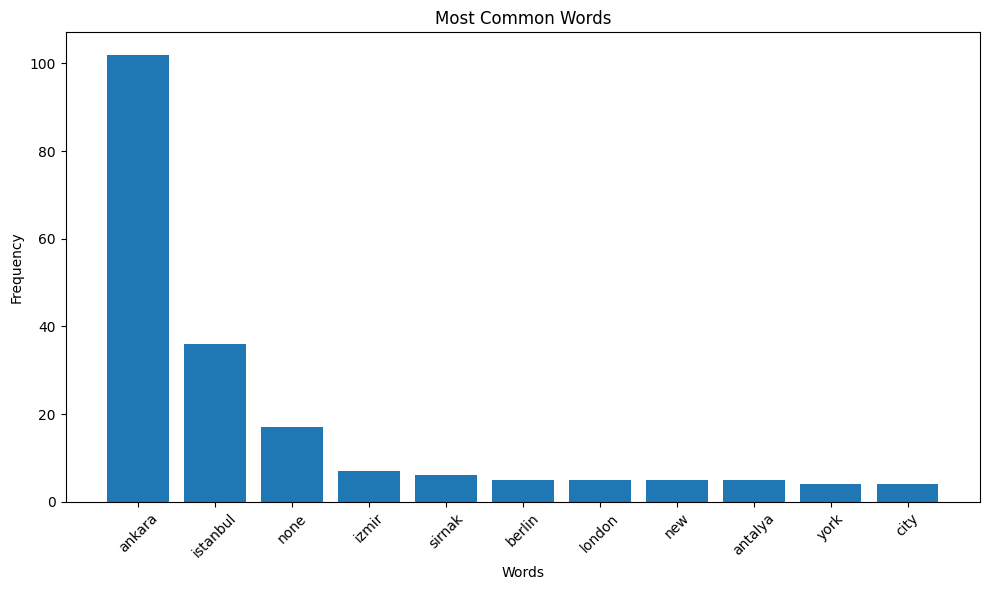

In [23]:
# Check Preferred cities

# Count words
stop_words = set(stopwords.words('english'))

words = ' '.join(df['city_preference'].astype(str)).lower().split()
words = [word for word in words if word not in stop_words]

word_freq = Counter(words).most_common(11)  # Top 10 Words
# word_freq = {k:v for k, v in Counter(words).items() if v >= 2}

# Create lists for plotting
words, counts = zip(*word_freq)
# words = word_freq.keys()
# counts = word_freq.values()

# Remove stopwords
# nltk.download('stopwords') I used nltk for the first time

# counts = [count for word, count in zip(words, counts) if word not in stop_words]


# Plot
plt.figure(figsize=(10, 6))
plt.bar(words, counts)
plt.xticks(rotation=45)
plt.title('Most Common Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

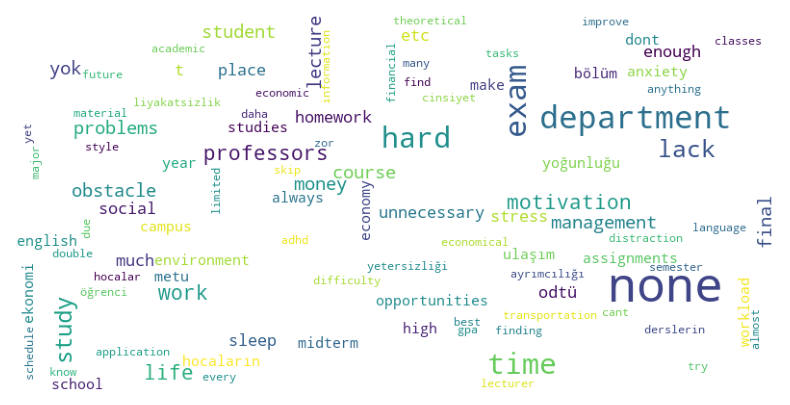

In [24]:
# Word Cloud
w = ' '.join(df['development_obstacles'].astype(str)).lower().split()
w = [word for word in w if word not in stop_words]
w = " ".join(w)



# Create wordcloud
# wordcloud = WordCloud(
#     width=800, 
#     height=400,
#     background_color='white'
# ).generate(text)

wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis',
    min_font_size=10,
    max_font_size=50
).generate(w)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('obstacle wordcloud.png')
plt.show()



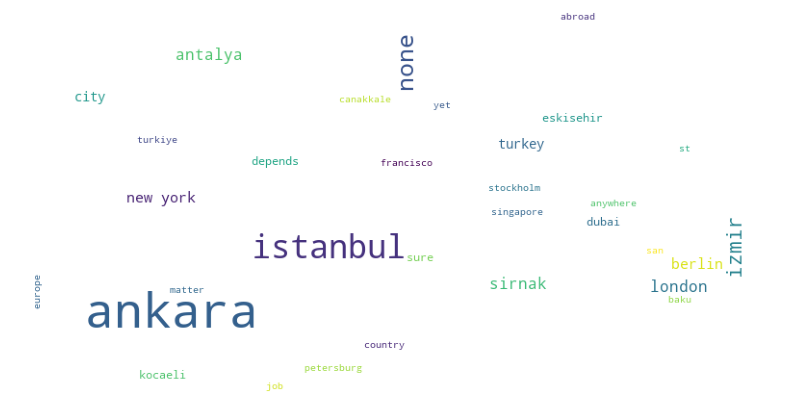

In [25]:
# Word Cloud
w = ' '.join(df['city_preference'].astype(str)).lower().split()
w = [word for word in w if word not in stop_words]
w = " ".join(w)



# Create wordcloud
# wordcloud = WordCloud(
#     width=800, 
#     height=400,
#     background_color='white'
# ).generate(text)

wordcloud = WordCloud(
    width=800, 
    height=400,
    background_color='white',
    max_words=100,
    colormap='viridis',
    min_font_size=10,
    max_font_size=50
).generate(w)

# Display
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

### Students haven't learned the correct spelling of Türkiye yet.

# Bolum ve Maas Beklenti iliskisi

In [26]:
df["department"].unique()

['Computer Engineering', 'Electrical and Electronics Engineering', 'Industrial Engineering', 'Petroleum and Natural Gas Engineering', 'Civil Engineering', 'Mechanical Engineering', 'Metallurgical and Materials Engineering', 'Mining Engineering', 'Chemical Engineering', 'Food Engineering']
Categories (10, object): ['Chemical Engineering', 'Civil Engineering', 'Computer Engineering', 'Electrical and Electronics Engineering', ..., 'Mechanical Engineering', 'Metallurgical and Materials Engineering', 'Mining Engineering', 'Petroleum and Natural Gas Engineering']

C:\Users\alini\AppData\Local\Temp\ipykernel_20400\1146089584.py:18: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels = s["dep"].unique(), rotation=45, fontsize=8)


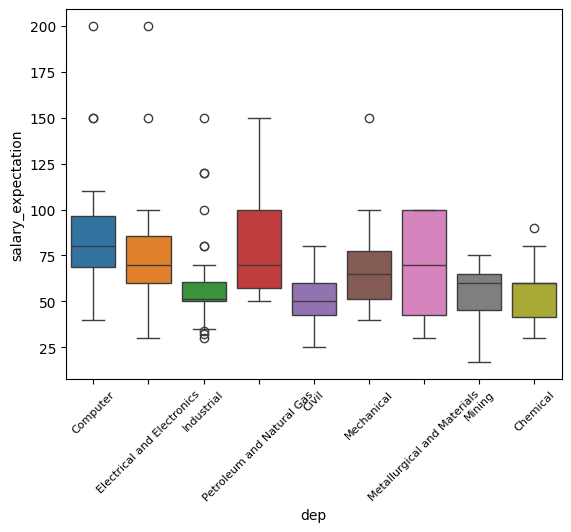

In [27]:
s = df.copy()

s["dep"] = df["department"].map({
    'Computer Engineering': 'Computer',
    'Electrical and Electronics Engineering': 'Electrical and Electronics',
    'Industrial Engineering': 'Industrial',
    'Petroleum and Natural Gas Engineering': 'Petroleum and Natural Gas',
    'Civil Engineering': 'Civil',
    'Mechanical Engineering': 'Mechanical',
    'Metallurgical and Materials Engineering': 'Metallurgical and Materials',
    'Mining Engineering': 'Mining',
    'Chemical Engineering': 'Chemical',
    'Food Engineering': 'Food'
})

ax = sns.boxplot(x="dep", y="salary_expectation", hue="dep", data=s.loc[s["salary_expectation"] < 210, ], legend=False)

ax.set_xticklabels(labels = s["dep"].unique(), rotation=45, fontsize=8)
plt.show()
# When salary_exp column is "clean", remove the filter
# Check for outliers

# Dikkat Cok Onemli!!!
### Asagidaki kod uyku isini cozuyor ama her turlu kategorik eda'de de ise yarar

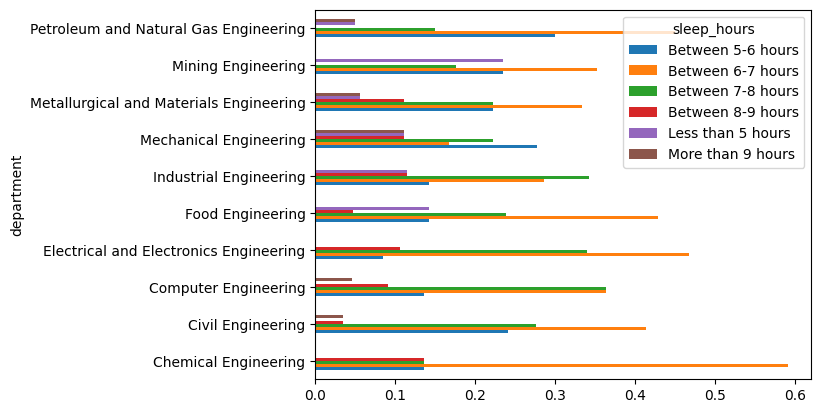

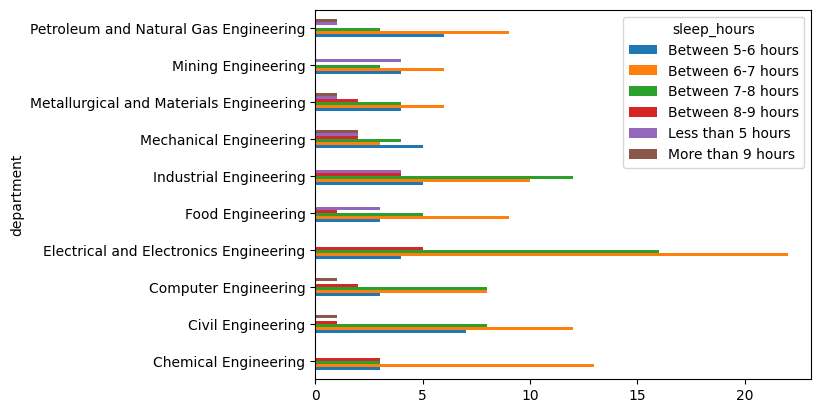

In [28]:
# If you want to take a subset of the departments, you can do it using the following format.

# subset = df.loc[df["department"].isin({"Electrical and Electronics Engineering", "Industrial Engineering", "Civil Engineering"}),] 
# g = subset.groupby(['department', 'sleep_hours'])["age"].count().to_frame().reset_index()

# Bu alttaki formatla cok fazla EDA cikar. Kategorik degiskenlerin icinden gecer kisaca.
g = df.groupby(['department', 'sleep_hours'])["age"].count().to_frame().reset_index() # iki tane kategori sec, age burda sembolik. 
# count yerine prop daha etkili olr

freq_table = pd.crosstab(df["department"], df["sleep_hours"], normalize="index") # yukaridaki pivot table yerine su crosstab da olur galiba
freq_table.plot(kind="barh")

p = g.pivot_table( # Bu da frequency tabloyu veriyor gibi dusunun
    index="department",
    columns="sleep_hours",
    values="age"
)
p.plot(kind="barh") # Bu da en basit haliyle bar graph. Cok guclu!
plt.show() # Cok sikisik. Subset te olur. veya figsizela oynayin
# Su anda saat 22:20. Daha 100.yila ugrayip kamp cantasini hazirlamam gerekiyor.

## Seneler gectikce abroad yada turkiye farki?

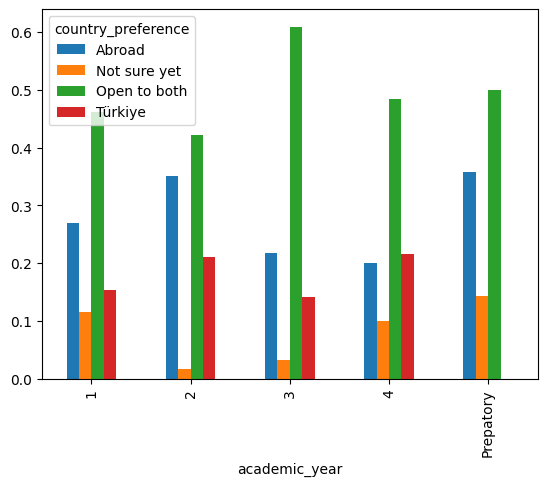

In [29]:
# frequency table
freq_table = pd.crosstab(df["academic_year"], df["country_preference"], normalize="index") # yukaridaki pivot table yerine su crosstab da olur galiba
# ayni zamanda proportion veriiyor baya iyi.

freq_table.plot(kind="bar")
plt.show()

# sns.barplot(x=)

# We can see that that the turkiye-abroad proportion is almost equal for 4th year students

## Enes bu da senin icin

In [30]:
df.job_search_duration.value_counts()

0-3 Months     163
3-6 Months      63
6-12 Months     20
1-2 Years        3
Name: job_search_duration, dtype: int64

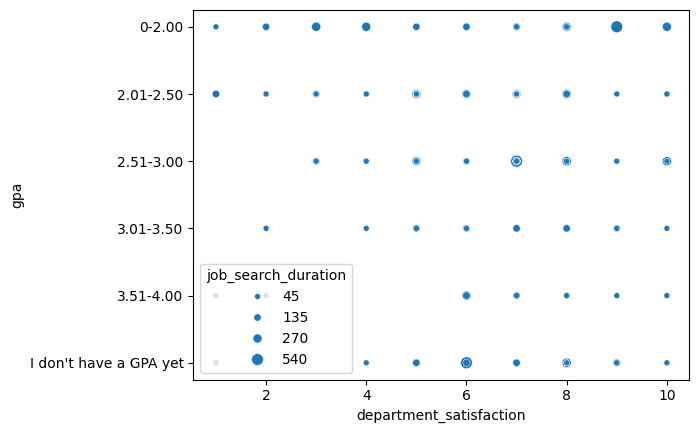

job_search_duration
gpa                    department_satisfaction                     
0-2.00                 1                                  45.000000
                       2                                 135.000000
                       3                                 135.000000
                       4                                 270.000000
                       5                                 135.000000
                       6                                  90.000000
                       7                                  83.571429
                       8                                 146.250000
                       9                                 540.000000
                       10                                157.500000
2.01-2.50              1                                  81.000000
                       2                                  45.000000
                       3                                  67.500000
                       4                                  45.000000
                       5                                  90.000000
                       6                                 115.714286
                       7                                  75.789474
                       8                                 118.928571
                       9                                  45.000000
                       10                                 45.000000
2.51-3.00              1                                        NaN
                       2                                        NaN
                       3                                  67.500000
                       4                                  45.000000
                       5                                 108.000000
                       6                                  60.000000
                       7                                 124.615385
                       8                                  83.571429
                       9                                  45.000000
                       10                                120.000000
3.01-3.50              1                                        NaN
                       2                                  45.000000
                       3                                        NaN
                       4                                  45.000000
                       5                                  90.000000
                       6                                  81.000000
                       7                                  63.000000
                       8                                  75.000000
                       9                                  75.000000
                       10                                 45.000000
3.51-4.00              1                                  45.000000
                       2                                  45.000000
                       3                                        NaN
                       4                                        NaN
                       5                                        NaN
                       6                                 123.750000
                       7                                  75.000000
                       8                                  45.000000
                       9                                  45.000000
                       10                                 45.000000
I don't have a GPA yet 1                                  45.000000
                       2                                        NaN
                       3                                        NaN
                       4                                  45.000000
                       5                                 135.000000
                       6                                 247.500000
                       7                                  90.000000
                       8            

In [31]:
# havali bir scatter plot lazim

# Burda sayisal kategorik degiskenleri sayisala cevircez. GPA icin aynisi yapilabilir msla.
subset = df.copy()
subset["job_search_duration"] = np.select(
    [subset["job_search_duration"] == "0-3 Months",
    subset["job_search_duration"] == "3-6 Months",
    subset["job_search_duration"] == "6-12 Months",
    subset["job_search_duration"] == "1-2 Years",
    subset["job_search_duration"] == "2-3 Years",
    subset["job_search_duration"] == "3 Years or more"],
    [45, 135, 270, 540, 900, 1200],
    default = 135
)

sns.scatterplot(
    x="department_satisfaction",
    y="gpa",
    size="job_search_duration",
    data=subset
) # olmuyor

plt.show()

subset.groupby(["gpa", "department_satisfaction"])["job_search_duration"].mean().to_frame() # Biraz buyuk bir cikti ama hos

### 23:06 ve Ali dukkani kapatir.
### Betul senin question araya kaynadi. Bence bu kodlar ve biraz yardim alarak sizin de merak ettiginiz seyleri yaparsiniz.
### Kolay gelsin <3

## Muhendis adaylari yil gectikce yurtdisi istegi azaliyor mu?